# Final Project Report

* Class: DS 5100
* Student Name: Louis Cocks
* Student Net ID: epx8hh
* This URL: https://github.com/Lcocks/DS5100_Final_Project/blob/main/Final_Project/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/Lcocks/DS5100_Final_Project/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
'''
#Monte_Carlo_Simulator
"""
Classes include Die(): Making a die to roll, Game(): Creating a game of rolling dice, and Analyzer(): Looking at metrics of a Game.

Requied installations include Pandas and NumPy and Random.
"""
import numpy as np
import pandas as pd
import random



#Die Creation.
class Die():
    """
    This class is for creating a 100 sided (default count) die stored as a Pandas Dataframe. The number of faces and weights of the die will be adjustable to allow for the die to be used as any other die. 
    The die can also be customized by the weight to allow for either a fair sided die or a unfairly distributed die.The weights are just positive numbers (integers or floats, including  0).
    Die() will initialize a Pandas DataFrame to be used through the class.
    inputs: self; faces: Each face of the die will show a unique number associated with that side and its corresponding weight in a Pandas DataFrame. Created with a NumPy Array is mandatory.
    """

    def __init__(self, faces = np.arange(1,101)):
        """
        __init__: This intializer will serve to create the DataFrame, set the initial Face count to 100 unless otherwise fed an Numpy Array, and Weight distribution to 1.0 evenly.
                  It will also set the faces to the index of the DataFrame as Faces.
        inputs: self; faces: will default to a Numpy Array of 1-100.
        returns: No return values.
        """
        self.faces = faces
        
        if isinstance(faces, np.ndarray) == False:
            raise TypeError("faces object must be of data type NumPy array and nothing else.")
        
        if np.unique(faces).size != len(faces):
            raise ValueError("The values in the numpy array faces must be distinct values.")
        
        _df = pd.DataFrame({'Faces': self.faces, 'Weight': list(1.0 for i in range(len(self.faces)))}).set_index('Faces')
        self._df = _df
        
    def new_weight(self): 
        """
        new_weight: This method has user input questions used to decide which Faces to change weights for. It will then adjust the weights held for those Faces within the DataFrame.
        inputs: self
        returns: No return values.
        """
        chg_face = [int(x.strip()) for x in input("Which face would you like to change the weight? note: All faces have a default weight of 1.0.\nEnter the information in a comma seperated numerical list.").split(",")] #Can take a list of faces to change weights for.
        for i in chg_face:  #Checking each value in chg_face list
            if not(i in self._df.index.unique(level='Faces')):
                raise IndexError("A value entered for face selection is not in the array of 1 to 100.")
        weight = float(input("What would you like the new weight to be?")) #Getting input for weight then converting to float, if float fails, value error if non-numerical.
        if not type(weight) is float:
            raise TypeError("Convert to float did not work, please enter a number.")
        #Replacing the axisting weights with the new weight.
        for i in chg_face:
            self._df.loc[i, 'Weight'] = weight
        print(f"Faces {chg_face} have a new weight of {weight}.")
    
    
    def die_roll(self, rolls = 1):
        """
        die_roll: This method is used for rolling the create die using the DataFrame holding the data and a Random function random.choices to produce a random Face.
                  The default version does not internall store the results, however the internally stored version is commented out if otherwise wanted.
        inputs: self; rolls: default to 1.
        returns: An instance of rolling the die a number of times.
        """
#Not stored version
        return [random.choices(self._df.index, self._df.Weight) for i in range(rolls)] 
        
#Internally stored version
#        results = []
#        for i in range(rolls):
#            roll = random.choices(self._df.index, self._df.Weight)
#            results.append(roll)
#        return results
        
    def show_data(self, highlight = False):
        """
        show_data: This method is for displaying the full table of data with its Faces and their corresponding weights with changes highlighted along with a dataframe returned value.
                   A custom function highlight_row() will also highlight any weights that do not have the default value of 1.
        inputs: self; highlight: default value is False andmethod returns a dataframe, any other input returns a display of the data and highlighted rows.
        returns: A fully laid out copy of the private DataFrame if highlight = False, otherwise returns a display of the data and highlighted rows.
        """
        if highlight == False:
            return self._df.copy()
        
        pd.set_option('display.max_rows', None)   #Condition to display all rows
        def highlight_row(_df, threshold, column): #Function created to be used to highlight a specific row red if there a number not equal to default 1.0
            is_max = pd.Series(data=False, index=_df.index)
            is_max['Weight'] = _df.loc['Weight'] != threshold
            return ['background-color: red' if is_max.any() else '' for v in is_max]
        return self._df.copy().style.apply(highlight_row, threshold=1, column='Weight', axis=1) #Displaying table and highlighted rows
        
        


#Playing a Game with dice.
class Game():
    """
    This class is for creating a Die rolling game that has the same number of sides for each die but the weights can vary for the die.
    Each game is initialized with a Python list that contains one or more dice of the Die() object type.
    Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
    Game objects only keep the results of their most recent play.
    inputs: self; dice: A Die() object wrapped in a python list to be a singular Die() or many.
    """
    
    def __init__(self, dice):
        """
        __init__: This initializer will need a list of Die in a list format. It will insure that the number of entered Faces for each Die are equal.
        inputs: self; dice: has no default as a list of Die's created through another class is required.
        returns: No return values.
        """
        self.dice = dice
        #Returning a ValueError if the input dice are not in list format.
        try:
            len(self.dice[0]._df.index)
        except TypeError as e:
            print("Your Dice must be in a list!.")
            
        #Returning a ValueError if the number of Faces do no align with each other.
        _length = len(self.dice[0]._df.index)
        for i in range(len(self.dice)):
            if i > 0:
                if _length != len(self.dice[i]._df.index):
                    raise ValueError("The number of Faces for at least one of the Die are not the same as the others!")
    
    def play(self, dice_rolls = 1):
        """
        play: This method is used for rolling all of the Dice given to the class a specified number of times and storing those results in a private dataframe.
        inputs: self; dice_rolls: defaults to 1 for 1 rolling of each Die.
        returns: No return values.
        """
        dice_rolls = abs(dice_rolls)
        #Private dataframe instantiation
        _dice_rolling_results = pd.DataFrame()
        
        for i in range(len(self.dice)):
            _roll_result = pd.DataFrame(random.choices(self.dice[i]._df.index, self.dice[i]._df.Weight) for j in range(dice_rolls))
            _dice_rolling_results = pd.concat([_dice_rolling_results,_roll_result], axis = 1)
        _dice_rolling_results.columns = [k for k in range(len(self.dice))]
        
        self._dice_rolling_results = _dice_rolling_results
#For testing        
        #return _dice_rolling_results
        
    def results(self, df_format = 1):
        """
        results: This method is used to display the rolling results in either a Wide (default) or Narrow formatted dataframe.
        inputs: self; df_format: defaults to 1 and will only accept either 1 (corresponding to Wide) or 2 (corresponding to Narrow).
        returns: A copy of the private dataframe in the specified format.
        """
        if not(df_format in (1,2)):
            raise ValueError("Formatting can only be entered as '1' for Wide or '2' for Narrow.")
        
        copy = self._dice_rolling_results.copy(deep = True) 
        
        if df_format == 1:
            df_wide = copy.rename_axis('Roll Number').rename_axis('Die', axis = 'columns')
            return df_wide
        else:
            cols = copy.columns.to_list()
            df_narrow = pd.melt(copy, value_vars = cols).set_index('variable', append = True)
            df_narrow.index.names = ['Roll Number', 'Die']
            return df_narrow



#Analyzing a Game of rolled Dice
class Analyzer():
    """
    This class will take the results of a single game and compute various descriptive statistical properties about said game.
    inputs: self; game: A Game() object of which the play() method of Game() has been run for, to insure a .
    """
    def __init__(self, game):
        """
        __init__: The initializer will require a Game instance be input and verify its correct object orientation.
        inputs: self; game: has no default as a Game object is required.
        returns: No return values.
        """
        self.game = game
        #testing will require using the two classes Die() and Game().
        if isinstance(self.game, type(Game([Die()]))) == False:
            raise ValueError("The passed object is not a Game, passing only a Game type object will work.")
        
    def jackpot(self):
        """
        jackpot: This method will be used to calculate if all the Die, when rolled, land on the same Face. This is considered a jackpot.
        inputs: self
        returns: An integer value for the number of jackpots achieved in a game.
        """
        jackpot_count = (self.game.results().nunique(axis=1) == 1).sum()
        if len(self.game.results().nunique(axis=0)) == 1:
            print('Cannot get a jackpot with 1 die! Try again with multiple.')
            return
        return int(jackpot_count)
        
    def face_count_per_roll(self):
        """
        face_count_per_roll: This method is for counting and siplaying each of the times a certain face of the die is rolled for each of the rolls attempted. 
        inputs: self
        returns: A dataframe with the possible faces rolled as the columns and each roll instance of the dice as the index. The values show the number of times (count) each of the faces is rolled.
        """
        return self.game.results().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        
    def combo_count(self):
        """
        combo_count: This method will create a new dataframe containing the counts of each distinct combination (of any order i.e. sorting each row) of faces rolled among the dice in each roll.
        inputs: self
        returns: A dataframe with a multiindex for the rows and Combination for each distinct combination, and the column Frequency for the count for how many times the combination occurs in the game.
        """
        combo_df = self.game.results().apply(lambda row: list(sorted(row)), axis = 1)
        combo_df = combo_df.value_counts().reset_index(name = 'Frequency').rename(columns = {'index': 'Combination'})
        return combo_df
        
    def permutation(self):
        """
        permutation: This method will create a new dataframe containing the counts of each distinct combination (of only the rolled order) of faces in their current rolled order """\
        """for each of the times rolled in the game.
        inputs: self
        returns: A dataframe with the mutltiindex for rows and Combination for each distinct combination, and the count Frequency for how many times that combination occurs in the game.
        """
        perm_df = self.game.results().apply(lambda row: list(row), axis = 1)
        perm_df = perm_df.value_counts().reset_index(name = 'Frequency').rename(columns = {'index': 'Combination'})
        return perm_df
'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
'''
#Monte_Carlo_Simulator_test.py
from unittest import mock
import unittest
import pandas as pd
from Monte_Carlo_Simulator.Monte_Carlo_Simulator import Die, Game, Analyzer
#The first Monte_Carlo_Simulator is for the directory then the python file is named Monte_Carlo_Simulator therefore Monte_Carlo_Simulator.Monte_Carlo_Simulator--
class test_objectSuite(unittest.TestCase):
    """
    This class is for testing the Project_Dice.py file and it corresponding classes and methods.
    From unittest - mock will allow for inputs made by a user to be preset for testing.
    """
    
    #Die()
    
    def test_1_Die(self):
        
        test_object = Die()
        
        self.assertIsInstance(test_object, Die)
        
    @mock.patch('Monte_Carlo_Simulator.Monte_Carlo_Simulator.input', create=True)
    def test_2_new_weight(self, mocked_input):
        
        mocked_input.side_effect = ['1,2,3', '1.5']
        
        test_object = Die()
        test_object.new_weight() #The mocked_input.side_effect is the input values 1,2,3 for the Faces selected then the input is 1.0 for what to change the weights of the faces too.
        
        default = Die()

        self.assertNotEqual(test_object._df.loc[1,'Weight'], default._df.loc[1,'Weight']) #Testing the change of weights.
        self.assertEqual(type(test_object._df), type(default._df)) #Testing the data structure output.
    
    def test_3_die_roll(self):
        
        test_object = Die()
        test_object.die_roll()
        
        self.assertTrue(isinstance(test_object.die_roll(), list))
    
    def test_4_show_data(self):
        
        test_object = Die()
        
        self.assertTrue(isinstance(test_object.show_data(), type(pd.DataFrame()))) #Testing for the regular dataframe output.
        
        self.assertEqual(type(test_object.show_data(2)), type(pd.DataFrame().style)) #Testing for the table return with styling.
    
    #Game()
    def test_5_Game(self):
        
        test_object = Game([Die()])
        
        self.assertIsInstance(test_object, Game)
        
    def test_6_play(self):
        
        test_object = Game([Die()])
        test_object.play()
        
        self.assertTrue(type(getattr(test_object,'_dice_rolling_results')), type(pd.DataFrame()))
        
    def test_7_results(self):
        
        test_object = Game([Die()])
        test_object.play()
        
        self.assertTrue(isinstance(test_object.results(), type(pd.DataFrame()))) #Testing for the wide formatted data frame.
        
        self.assertTrue(isinstance(test_object.results(2), type(pd.DataFrame()))) #Testing for the narrow formatted data frame.
    
    #Analyzer()
    def test_8_Analyzer(self):
        
        test_object = Game([Die()])
        test_object.play()
        test_object = Analyzer(test_object)
        
        self.assertIsInstance(test_object, Analyzer)
        
    def test_9_jackpot(self):
    
        test_object = Game([Die()])
        test_object.play()
        if len(test_object.results().nunique(axis=0)) == 1:

            self.assertEqual(len(test_object.results().nunique(axis=0)), 1) #Testing code with a single die rolled.
        else:    
            test_object = Analyzer(test_object)
        
            self.assertTrue(isinstance(test_object.jackpot(), int)) #Testing code with multiple die rolled (true jackpot).
    
    def test_10_face_count_per_roll(self):
        
        test_object = Game([Die()])
        test_object.play()
        test_object = Analyzer(test_object)
        
        self.assertTrue(isinstance(test_object.face_count_per_roll(), type(pd.DataFrame())))
        
    def test_11_combo_count(self):
        
        test_object = Game([Die()])
        test_object.play()
        test_object = Analyzer(test_object)
        
        self.assertTrue(isinstance(test_object.combo_count(), type(pd.DataFrame())))
        
    def test_12_permutation(self):
        
        test_object = Game([Die()])
        test_object.play()
        test_object = Analyzer(test_object)
        
        self.assertTrue(isinstance(test_object.permutation(), type(pd.DataFrame())))
        

        
if __name__ == '__main__':
    
    unittest.main()
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [169]:
from Monte_Carlo_Simulator import Monte_Carlo_Simulator #Using this for my message :)

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [170]:
help(Monte_Carlo_Simulator)

Help on module Monte_Carlo_Simulator.Monte_Carlo_Simulator in Monte_Carlo_Simulator:

NAME
    Monte_Carlo_Simulator.Monte_Carlo_Simulator - Classes include Die(): Making a die to roll, Game(): Creating a game of rolling dice, and Analyzer(): Looking at metrics of a Game.

DESCRIPTION
    Requied installations include Pandas and NumPy and Random.

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  This class will take the results of a single game and compute various descriptive statistical properties about said game.
     |  inputs: self; game: A Game() object of which the play() method of Game() has been run for, to insure a .
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      __init__: The initializer will require a Game instance be input and verify its correct object orientation.
     |      inputs: self; game: has no default as a Game object is r

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/Lcocks/DS5100_Final_Project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [171]:
from Monte_Carlo_Simulator.Monte_Carlo_Simulator import Die, Game, Analyzer #import inlcuded in README.md using this to call class name directly.
import numpy as np
import pandas as pd
Die_Fair = Die(np.array(['H','T']))
Die_Unfair = Die(np.array(['H','T']))
print("Fair Die: ",'\n', Die_Fair.show_data())
Die_Unfair.new_weight() #Using user input through questions! I know it was not required but wanted a nice touch for communicating between user and program.
print("Unfair Die: ", '\n', Die_Unfair.show_data()) #Use returns DataFrame and in README optional argument show_data(2) requires display(...) to show highlights.

Fair Die:  
        Weight
Faces        
H         1.0
T         1.0


Changing all values? Enter Yes or No No
Which face would you like to change the weight? note: All faces have a default weight of 1.0.
Enter the information in a comma seperated numerical list. H
What would you like the new weight to be? 5.0


Face(s) ['H'] have a new weight of 5.0.
Unfair Die:  
        Weight
Faces        
H         5.0
T         1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [9]:
Game1 = Game([Die(np.arange(1,3)), Die(np.arange(1,3))])
Game1.play(1000) #Use Game1.results() to display.

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [198]:
Game2 = Game([Die_Fair, Die_Unfair, Die_Unfair]) #Dice from above
Game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [199]:
print(f"Fair game analyzer with 2 die {Analyzer(Game1).jackpot()} out of 1000 flips are jackpots.")
print(f"Unfair game analyzer with 2 unfair and 1 fair die {Analyzer(Game2).jackpot()} out of 1000 flips are jackpots.")

Fair game analyzer with 2 die 497 out of 1000 flips are jackpots.
Unfair game analyzer with 2 unfair and 1 fair die 358 out of 1000 flips are jackpots.


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [200]:
print(f"Fair game analyzer with 2 fair coins {Analyzer(Game1).jackpot() / 1000 * 100}%.")
print(f"Unfair game analyzer with 2 unfair coins and 1 fair coin {Analyzer(Game2).jackpot() / 1000 * 100}%.")

Fair game analyzer with 2 fair coins 49.7%.
Unfair game analyzer with 2 unfair coins and 1 fair coin 35.8%.


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Game 1 & 2 Relative Frequencies of Jackpots')

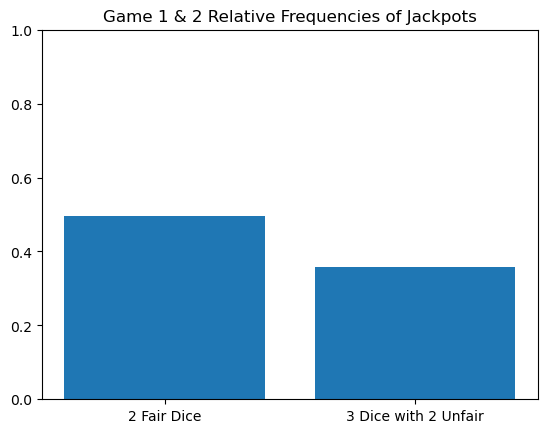

In [211]:
import matplotlib.pyplot as plt
plt.ylim(0.0,1.0)
plt.bar(['2 Fair Dice', '3 Dice with 2 Unfair'], [(Analyzer(Game1).jackpot()/1000), (Analyzer(Game2).jackpot()/1000)])
plt.title("Game 1 & 2 Relative Frequencies of Jackpots")

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [203]:
Die1 = Die(np.arange(1,7))
Die2 = Die(np.arange(1,7))
Die3 = Die(np.arange(1,7))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [204]:
Die3.new_weight()

Which face would you like to change the weight? note: All faces have a default weight of 1.0.
Enter the information in a comma seperated numerical list. 6
What would you like the new weight to be? 5.0


Face(s) [6] have a new weight of 5.0.


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [5]:
Die2.new_weight()

Which face would you like to change the weight? note: All faces have a default weight of 1.0.
Enter the information in a comma seperated numerical list. 1
What would you like the new weight to be? 5.0


Face(s) [1] have a new weight of 5.0.


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [6]:
Game3 = Game([Die(np.arange(1,7)), Die(np.arange(1,7)), Die(np.arange(1,7)), Die(np.arange(1,7)), Die(np.arange(1,7))])
Game3.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [7]:
Game4 = Game([Die2, Die3, Die(np.arange(1,7)), Die(np.arange(1,7)), Die(np.arange(1,7))])
Game4.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Fair game analyzer with 5 fair die 0.7000000000000001%.
Unfair game analyzer with 2 unfair die and 3 fair die 0.4%.


Text(0.5, 1.0, 'Game 3 & 4 Relative Frequencies of Jackpots')

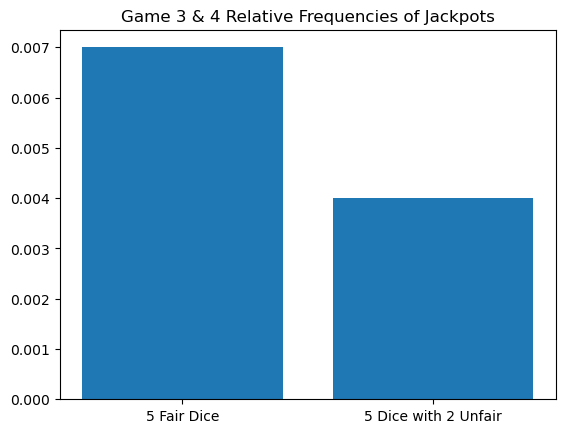

In [210]:
print(f"Fair game analyzer with 5 fair die {Analyzer(Game3).jackpot() / 1000 * 100}%.")
print(f"Unfair game analyzer with 2 unfair die and 3 fair die {Analyzer(Game4).jackpot() / 1000 * 100}%.")

plt.bar(['5 Fair Dice', '5 Dice with 2 Unfair'], [(Analyzer(Game3).jackpot()/1000), (Analyzer(Game4).jackpot()/1000)])
plt.title("Game 3 & 4 Relative Frequencies of Jackpots")

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [91]:
Die_Alpha = Die(np.array(['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']))
Die_Alpha.new_weight()

Changing all values? Enter Yes or No Yes
List the weights in a comma seperated list with the total number of weights matching the total number of letters used to create the Die(). 374061888, 70195826, 138416451, 169330528, 529117365, 95422055, 91258980, 216768975, 320410057, 9613410, 35373464, 183996130, 110504544, 313720540, 326627740, 90376747, 4550166, 277000841, 294300210, 390965105, 117295780, 46337161, 79843664, 8369915, 75294515, 4975847


All faces have their new weights.


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [165]:
Game_Alpha = Game([Die_Alpha, Die_Alpha, Die_Alpha, Die_Alpha])
Game_Alpha.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [166]:
from time import time
words = pd.read_csv("../Final_Project_Dev/scrabble_words.txt", header=None)
words = words.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
perms = Analyzer(Game_Alpha).permutation()
_count = 0
%time
for i, j in enumerate(perms['Combination']):
    j = ''.join(j)
    if j in words[0].values:
        _count += 1
print(f"The total number of words created are {_count}.")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
The total number of words created are 49.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [167]:
Game_Alpha2 = Game([Die_Alpha, Die_Alpha, Die_Alpha, Die_Alpha, Die_Alpha])
Game_Alpha2.play(1000)
perms = Analyzer(Game_Alpha2).permutation()
_count2 = 0
%time
for i, j in enumerate(perms['Combination']):
    j = ''.join(j)
    if j in words[0].values:
        _count2 += 1
print(f"The total number of words created for Game_Alpha with 4 die is {_count} vs Game_Alpha2 with 5 die is {_count2}.")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
The total number of words created for Game_Alpha with 4 die is 49 vs Game_Alpha2 with 5 die is 8.
